# Imports

In [1]:
import os
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
from concurrent.futures import ThreadPoolExecutor

# Read and concatenate the data

In [11]:
df1 = pd.read_json('data1.json')
df2 = pd.read_json('data2.json')
df3 = pd.read_json('data3.json')
df4 = pd.read_json('data4.json')
df5 = pd.read_json('data5.json')
df6 = pd.read_json('data6.json')
df = pd.concat([df1,df2,df3,df4,df5,df6])

In [12]:
df.describe()

,building_id,name,image,address,typology_gen,typology_spe,description,date
count,15690,15690,15320,15690,15690,15690,5455,10819
unique,15690,12796,15319,14331,6,224,5166,2751
top,https://www.lombardiabeniculturali.it/architet...,Chiesa di S. Rocco,,Truccazzano (MI),"architettura per la residenza, il terziario e ...",chiesa,Edificio in muratura con muri perimetrali in p...,sec. XVIII
freq,1,68,2,17,6689,2981,86,940


In [13]:
print(df.image.isnull().sum())
print(df.shape)
df = df[~df.image.isnull()].reset_index(drop=True) # Keeping only observations that have a non missing image

370
(15690, 8)


In [5]:
df = df.iloc[:10,]

In [6]:
# Directory to store images
image_dir = "images"

In [28]:
def download_images(df, image_column, save_dir):
    for idx, url in enumerate(df[image_column]):
        try:
            # Fetch the image
            response = requests.get(url)
            response.raise_for_status()  # Raise an exception for HTTP errors
            
            # Convert response content to an image
            img = Image.open(BytesIO(response.content))
            
            # Save the image locally
            image_path = os.path.join(save_dir, f"image_{idx}.jpg")
            img.convert("RGB").save(image_path, "JPEG")  # Save as JPEG format
            
            # Optionally log progress
            print(f"Saved: {image_path}")
        except Exception as e:
            print(f"Error downloading image at index {idx}: {e}")

# Apply the function to download images
download_images(df, image_column="image", save_dir=image_dir)


Saved: images\image_0.jpg
Saved: images\image_1.jpg
Saved: images\image_2.jpg
Saved: images\image_3.jpg
Saved: images\image_4.jpg
Saved: images\image_5.jpg
Saved: images\image_6.jpg
Saved: images\image_7.jpg
Saved: images\image_8.jpg
Saved: images\image_9.jpg


In [30]:
df["local_image_path"] = [os.path.join(image_dir, f"image_{idx}.jpg") for idx in range(len(df))]

C:\Users\lucak\AppData\Local\Temp\ipykernel_26516\3778205220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["local_image_path"] = [os.path.join(image_dir, f"image_{idx}.jpg") for idx in range(len(df))]


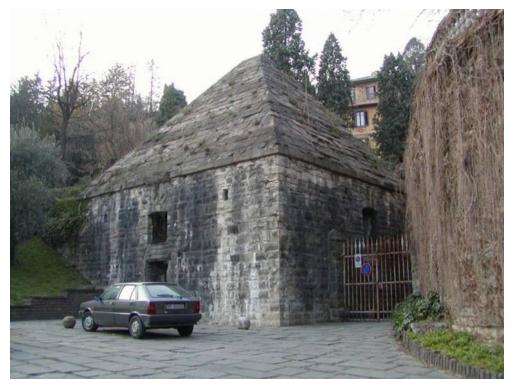

In [31]:
import matplotlib.pyplot as plt

# Verify one of the images
img = Image.open(df["local_image_path"][0])
plt.imshow(img)
plt.axis("off")
plt.show()


In [33]:
df

,building_id,name,image,address,typology_gen,typology_spe,description,date,local_image_path
0,https://www.lombardiabeniculturali.it/architet...,Antica Polveriera Veneta Via C. Beltrami,https://www.lombardiabeniculturali.it/assets/i...,Via C. Beltrami - Bergamo (BG),architettura fortificata,casamatta,None,1580 - 1582,images\image_0.jpg
1,https://www.lombardiabeniculturali.it/architet...,Antica Polveriera Veneta Via Sforza Pallavicino,https://www.lombardiabeniculturali.it/assets/i...,Via Sforza Pallavicino - Bergamo (BG),architettura fortificata,casamatta,La polveriera appare formata dalla sovrapposiz...,1580 - 1582,images\image_1.jpg
2,https://www.lombardiabeniculturali.it/architet...,Antica torre di Casorezzo,https://www.lombardiabeniculturali.it/assets/i...,Via Inveruno (nel centro edificato storico per...,architettura fortificata,torre,None,sec. XI,images\image_2.jpg
3,https://www.lombardiabeniculturali.it/architet...,Avanzi di torre passante,https://www.lombardiabeniculturali.it/assets/i...,"Via Cavour, 21, 5 (Nel centro abitato, integra...",architettura fortificata,torre,L'avanzo di torre di epoca medioevale (il cast...,sec. XII - sec. XIII,images\image_3.jpg
4,https://www.lombardiabeniculturali.it/architet...,Bastia di San Giovanni - complesso,https://www.lombardiabeniculturali.it/assets/i...,"Via San Giovanni (Fuori dal centro abitato, is...",architettura fortificata,mura difensive,La fortificazione si compone di un recinto for...,sec. XIII,images\image_4.jpg
5,https://www.lombardiabeniculturali.it/architet...,Bastione di Forte Noion,https://www.lombardiabeniculturali.it/assets/i...,"Cantone, Motteggiana (MN)",architettura fortificata,forte,None,sec. XVIII - 1824,images\image_5.jpg
6,https://www.lombardiabeniculturali.it/architet...,Bastioni di Cremona (resti) - complesso,https://www.lombardiabeniculturali.it/assets/i...,Cremona (CR),architettura fortificata,mura difensive,None,sec. XVI,images\image_6.jpg
7,https://www.lombardiabeniculturali.it/architet...,Bastioni di Pizzighettone (resti) - complesso,https://www.lombardiabeniculturali.it/assets/i...,"Via Adriano Boneschi (Nel centro abitato, dist...",architettura fortificata,mura difensive,A Pizzighettone si ammira una delle cinte mura...,sec. XIV - post 1720,images\image_7.jpg
8,https://www.lombardiabeniculturali.it/architet...,Bastioni spagnoli - complesso,https://www.lombardiabeniculturali.it/assets/i...,"Via Giuseppe Bovara (Nel centro abitato, disti...",architettura fortificata,mura difensive,Pianta irregolare con bastioni e fossato.,None,images\image_8.jpg
9,https://www.lombardiabeniculturali.it/architet...,Borghetto - complesso,https://www.lombardiabeniculturali.it/assets/i...,"Vassalli, Scanzorosciate (BG)",architettura fortificata,castello,Le origini del complesso fortificato risalgono...,sec. X,images\image_9.jpg


In [35]:
from sklearn.model_selection import train_test_split

# Split DataFrame into training and validation
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Prepare training and validation data
train_image_paths = train_df["local_image_path"].values
train_labels = train_df["typology_gen"].values

val_image_paths = val_df["local_image_path"].values
val_labels = val_df["typology_gen"].values


In [36]:
import tensorflow as tf

def preprocess_image(image_path, label):
    # Read the image from file
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224])  # Resize to ResNet input size
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Create TensorFlow Datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_image_paths, train_labels))
train_ds = train_ds.map(preprocess_image).batch(32).shuffle(buffer_size=100)

val_ds = tf.data.Dataset.from_tensor_slices((val_image_paths, val_labels))
val_ds = val_ds.map(preprocess_image).batch(32)


In [37]:
train_ds

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

# Images downloading

In [15]:
image_dir = "../images"

# Function to process a single row (download and resize image)
def process_row(row, save_dir, target_size=(224, 224)):
    idx = row.Index  # Unique index for naming
    url = row.image  # Access column as an attribute
    save_path = os.path.join(save_dir, f"image_{idx}.jpg")
    try:
        # Download the image
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        # Convert to RGB and resize
        img = img.convert("RGB").resize(target_size, Image.Resampling.LANCZOS)
        img.save(save_path, "JPEG")
        return save_path  # Return path for updating the DataFrame
    except Exception as e:
        print(f"Error processing image {idx}: {e}")
        return None  # Return None for failed downloads

# Function to download and resize all images
def download_and_resize_images(df, image_column, save_dir):
    paths = []  # Store paths or None for each image
    with ThreadPoolExecutor(max_workers=10) as executor:
        results = executor.map(lambda row: process_row(row, save_dir), df.itertuples(index=True))
        paths = list(results)
    return paths

# Download and resize images, then update DataFrame
df["local_image_path"] = download_and_resize_images(df, image_column="image", save_dir=image_dir)

# Save updated DataFrame
df.to_csv("updated_dataset.csv", index=False)
print("Updated DataFrame saved!")

Error processing image 344: Invalid URL '': No scheme supplied. Perhaps you meant https://?
Error processing image 10112: Invalid URL '': No scheme supplied. Perhaps you meant https://?
Updated DataFrame saved!
